## 50. 進化的アルゴリズム（evolutionaryalgorithm：EA）

### <font color=blue>**1.** </font> 遺伝的アルゴリズム（Genetic Algorithm：GA）

#### <font color=green>**1.1.** </font> Numpyで自作した例

In [ ]:
## 出典 ： https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

In [ ]:
### Genetic Algorithm for OneMax

In [ ]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand

In [ ]:
# objective function
def onemax(x):
	return -sum(x)

In [ ]:
# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]

In [ ]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

In [ ]:
# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]

In [ ]:
# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
	# initial population of random bitstring
	pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
	# keep track of best solution
	best, best_eval = 0, objective(pop[0])
	# enumerate generations
	for gen in range(n_iter):
		# evaluate all candidates in the population
		scores = [objective(c) for c in pop]
		# check for new best solution
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
		# select parents
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# create the next generation
		children = list()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop = children
	return [best, best_eval]

In [ ]:
# define the total iterations
n_iter = 100
# bits
n_bits = 20
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)

In [ ]:
# perform the genetic algorithm search
best, score = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
print('f(%s) = %f' % (best, score))

In [ ]:
### Genetic Algorithm for Continuous Function Optimization

In [ ]:
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand

In [ ]:
# objective function
def objective(x):
  return (x[0]-2)**2.0 + (x[1]+3)**2.0

In [ ]:
# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
	decoded = list()
	largest = 2**n_bits
	for i in range(len(bounds)):
		# extract the substring
		start, end = i * n_bits, (i * n_bits)+n_bits
		substring = bitstring[start:end]
		# convert bitstring to a string of chars
		chars = ''.join([str(s) for s in substring])
		# convert string to integer
		integer = int(chars, 2)
		# scale integer to desired range
		value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])
		# store
		decoded.append(value)
	return decoded

In [ ]:
# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]

In [ ]:
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]

In [ ]:
# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]

In [ ]:
# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
	# initial population of random bitstring
	pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]
	# keep track of best solution
	best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
	# enumerate generations
	for gen in range(n_iter):
		# decode population
		decoded = [decode(bounds, n_bits, p) for p in pop]
		# evaluate all candidates in the population
		scores = [objective(d) for d in decoded]
		# check for new best solution
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval = pop[i], scores[i]
				print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))
		# select parents
		selected = [selection(pop, scores) for _ in range(n_pop)]
		# create the next generation
		children = list()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop = children
	return [best, best_eval]

In [ ]:
# define range for input
bounds = [[-5.0, 5.0], [-5.0, 5.0]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * len(bounds))

In [ ]:
# perform the genetic algorithm search
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

In [ ]:
# define range for input
bounds = [[-50.0, 50.0], [-50.0, 50.0]]
# define the total iterations
n_iter = 1000

# perform the genetic algorithm search
best, score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))

#### <font color=green>**1.2.** </font> ライブラリを使用：One-Max問題

DEAP公式ドキュメント ： https://deap.readthedocs.io/en/master/index.html

In [ ]:
## 出典 ： https://github.com/DEAP/deap/blob/master/examples/ga/onemax.py

In [ ]:
import random

from deap import base
from deap import creator
from deap import tools

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

In [ ]:
# Attribute generator 
#   define 'attr_bool' to be an attribute ('gene')
#   which corresponds to integers sampled uniformly
#   from the range [0,1] (i.e. 0 or 1 with equal probability)
toolbox.register("attr_bool", random.randint, 0, 1)

In [ ]:
# Structure initializers
#   define 'individual' to be an individual
#   consisting of 100 'attr_bool' elements ('genes')
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, 100)

In [ ]:
# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# the goal ('fitness') function to be maximized
def evalOneMax(individual):
    return sum(individual),

In [ ]:
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", evalOneMax)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator with a probability to
# flip each attribute/gene of 0.05
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

# operator for selecting individuals for breeding the next
# generation: each individual of the current generation
# is replaced by the 'fittest' (best) of three individuals
# drawn randomly from the current generation.
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
random.seed(64)

# create an initial population of 300 individuals
# (where each individual is a list of integers)
pop = toolbox.population(n=300)

# CXPB  is the probability with which two individuals are crossed
#
# MUTPB is the probability for mutating an individual
CXPB, MUTPB = 0.5, 0.2

In [ ]:
print("Start of evolution")
    
# Evaluate the entire population
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
  ind.fitness.values = fit
    
print("  Evaluated %i individuals" % len(pop))

# Extracting all the fitnesses of 
fits = [ind.fitness.values[0] for ind in pop]

# Variable keeping track of the number of generations
g = 0
    
# Begin the evolution
while max(fits) < 100 and g < 1000:
  # A new generation
  g = g + 1
  print("-- Generation %i --" % g)
        
  # Select the next generation individuals
  offspring = toolbox.select(pop, len(pop))
  # Clone the selected individuals
  offspring = list(map(toolbox.clone, offspring))
    
  # Apply crossover and mutation on the offspring
  for child1, child2 in zip(offspring[::2], offspring[1::2]):
    # cross two individuals with probability CXPB
    if random.random() < CXPB:
      toolbox.mate(child1, child2)
      # fitness values of the children
      # must be recalculated later
      del child1.fitness.values
      del child2.fitness.values

  for mutant in offspring:
    # mutate an individual with probability MUTPB
    if random.random() < MUTPB:
      toolbox.mutate(mutant)
      del mutant.fitness.values
    
  # Evaluate the individuals with an invalid fitness
  invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
  fitnesses = map(toolbox.evaluate, invalid_ind)
  for ind, fit in zip(invalid_ind, fitnesses):
    ind.fitness.values = fit
        
  print("  Evaluated %i individuals" % len(invalid_ind))
        
  # The population is entirely replaced by the offspring
  pop[:] = offspring
        
  # Gather all the fitnesses in one list and print the stats
  fits = [ind.fitness.values[0] for ind in pop]
        
  length = len(pop)
  mean = sum(fits) / length
  sum2 = sum(x*x for x in fits)
  std = abs(sum2 / length - mean**2)**0.5
        
  print("  Min %s" % min(fits), "  Max %s" % max(fits), "  Avg %s" % mean, "  Std %s" % std)

  
print("\n-- End of (successful) evolution --")
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

#### <font color=green>**1.3.** </font> ライブラリを使用：ナップサック問題

In [ ]:
## 出典 ： https://github.com/DEAP/deap/blob/master/examples/ga/knapsack.py

In [ ]:
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

In [ ]:
IND_INIT_SIZE = 5
MAX_ITEM = 50
MAX_WEIGHT = 50
NBR_ITEMS = 20

random.seed(64)

In [ ]:
# Create the item dictionary: item name is an integer, and value is 
# a (weight, value) 2-uple.
items = {}
# Create random items and store them in the items' dictionary.
for i in range(NBR_ITEMS):
    items[i] = (random.randint(1, 10), random.randint(0, 100))

In [ ]:
items

In [ ]:
creator.create("Fitness", base.Fitness, weights=(-1.0, 1.0))
creator.create("Individual", set, fitness=creator.Fitness)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_item", random.randrange, NBR_ITEMS)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_item, IND_INIT_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def evalKnapsack(individual):
    weight = 0.0
    value = 0.0
    for item in individual:
        weight += items[item][0]
        value += items[item][1]
    if len(individual) > MAX_ITEM or weight > MAX_WEIGHT:
        return 10000, 0             # Ensure overweighted bags are dominated
    return weight, value

In [ ]:
def cxSet(ind1, ind2):
    """Apply a crossover operation on input sets. The first child is the
    intersection of the two sets, the second child is the difference of the
    two sets.
    """
    temp = set(ind1)                # Used in order to keep type
    ind1 &= ind2                    # Intersection (inplace)
    ind2 ^= temp                    # Symmetric Difference (inplace)
    return ind1, ind2

In [ ]:
def mutSet(individual):
    """Mutation that pops or add an element."""
    if random.random() < 0.5:
        if len(individual) > 0:     # We cannot pop from an empty set
            individual.remove(random.choice(sorted(tuple(individual))))
    else:
        individual.add(random.randrange(NBR_ITEMS))
    return individual,

In [ ]:
toolbox.register("evaluate", evalKnapsack)
toolbox.register("mate", cxSet)
toolbox.register("mutate", mutSet)
toolbox.register("select", tools.selNSGA2)

In [ ]:
NGEN = 50
MU = 50
LAMBDA = 100
CXPB = 0.7
MUTPB = 0.2

In [ ]:
pop = toolbox.population(n=MU)
hof = tools.ParetoFront()
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean, axis=0)
stats.register("std", numpy.std, axis=0)
stats.register("min", numpy.min, axis=0)
stats.register("max", numpy.max, axis=0)
    
algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, 
                          MUTPB, NGEN, stats, halloffame=hof)

hof

#### <font color=green>**1.4.** </font> ライブラリを使用：Ackley関数

In [ ]:
## 出典 ： https://qiita.com/tyoshitake/items/e76f6f8e4110731606bc

In [ ]:
import random
from deap import base, creator, tools
from deap.benchmarks import ackley

In [ ]:
# 適応度クラスの作成
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [ ]:
# 個体クラスの作成
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
# Toolboxの作成
toolbox = base.Toolbox()

In [ ]:
# 遺伝子を生成する関数"attr_gene"を登録
toolbox.register("attr_gene", random.uniform, -500, 500)

In [ ]:
# 個体を生成する関数”individual"を登録
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_gene, 2)

In [ ]:
# 個体集団を生成する関数"population"を登録
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# 評価関数"evaluate"を登録
toolbox.register("evaluate", ackley)

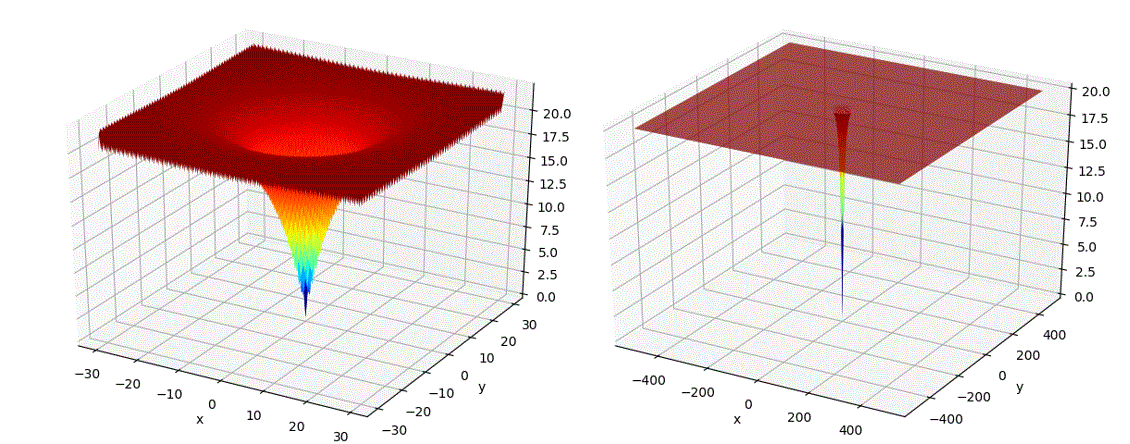

In [ ]:
# 交叉を行う関数"mate"を登録
toolbox.register("mate", tools.cxBlend, alpha=0.2)

In [ ]:
# 変異を行う関数"mutate"を登録
toolbox.register("mutate", tools.mutGaussian, mu=[
                 0.0, 0.0], sigma=[200.0, 200.0], indpb=0.2)

In [ ]:
# 個体選択法"select"を登録
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
random.seed(1)

# GAパラメータ
N_GEN = 100      # 繰り返し世代数

POP_SIZE = 1000  # 集団内の個体数
CX_PB = 0.5      # 交叉確率
MUT_PB = 0.2     # 変異確率

In [ ]:
# 個体集団の生成
pop = toolbox.population(n=POP_SIZE)
print("Start of evolution")

# 個体集団の適応度の評価
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
  ind.fitness.values = fit
print("  Evaluated %i individuals" % len(pop))

# 適応度の抽出
fits = [ind.fitness.values[0] for ind in pop]

In [ ]:
# 進化ループ開始
g = 0
while g < N_GEN:
  g = g + 1
  print("-- Generation %i --" % g)

  # 次世代個体の選択・複製
  offspring = toolbox.select(pop, len(pop))
  offspring = list(map(toolbox.clone, offspring))

  # 交叉
  for child1, child2 in zip(offspring[::2], offspring[1::2]):
    # 交叉させる個体を選択
    if random.random() < CX_PB:
      toolbox.mate(child1, child2)
      # 交叉させた個体は適応度を削除する
      del child1.fitness.values
      del child2.fitness.values

  # 変異
  for mutant in offspring:
    # 変異させる個体を選択
    if random.random() < MUT_PB:
      toolbox.mutate(mutant)
      # 変異させた個体は適応度を削除する
      del mutant.fitness.values

      # 適応度を削除した個体について適応度の再評価を行う
      invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      fitnesses = map(toolbox.evaluate, invalid_ind)
      for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

      print("  Evaluated %i individuals" % len(invalid_ind))

      # 個体集団を新世代個体集団で更新
      pop[:] = offspring

      # 新世代の全個体の適応度の抽出
      fits = [ind.fitness.values[0] for ind in pop]

      # 適応度の統計情報の出力
      length = len(pop)
      mean = sum(fits) / length
      sum2 = sum(x*x for x in fits)
      std = abs(sum2 / length - mean**2)**0.5

      print("  Min %s" % min(fits), "  Max %s" % max(fits), "  Avg %s" % mean, "  Std %s" % std)

In [ ]:
# 最良個体の抽出
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

### <font color=blue>**2.** </font> 遺伝的プログラミング（Genetic Programming：GP）

#### <font color=green>**2.1.** </font> 曲線のフィッティングの例

In [ ]:
## 出典 ： https://wacchoz.hatenablog.com/entry/2015/09/21/124600

In [ ]:
!pip install deap

In [ ]:
!sudo apt-get install graphviz graphviz-dev
!pip install pygraphviz

In [ ]:
import operator
import math
import random

import numpy as np

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [ ]:
# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

In [ ]:
pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
pset.renameArguments(ARG0='x')

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [ ]:
# これが探したい関数
def target(x):
    return x**4 + x**3 + x**2 + x + 1/(x+3)

In [ ]:
# 残差２乗和を最小化する
def evalSymbReg(individual, points):
    func = toolbox.compile(expr=individual)
    sqerrors = ((func(x) - target(x))**2 for x in points)
    return math.fsum(sqerrors) / len(points),

In [ ]:
toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

In [ ]:
#random.seed(318)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", np.mean)
mstats.register("std", np.std)
mstats.register("min", np.min)
mstats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 
                               500,   ## 100 -> 500
                                       ## 10000くらいにするとかなりフィット（過学習）する
                               stats=mstats,
                               halloffame=hof, verbose=True)

expr = tools.selBest(pop, 1)[0]
tree = gp.PrimitiveTree(expr)
print(str(tree))

In [ ]:
nodes, edges, labels = gp.graph(expr)
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)
pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="dot")

nx.draw_networkx_nodes(g, pos,
                       node_color="orange"   ###
                       )
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos, labels)
plt.show()

In [ ]:
x = [x/10. for x in range(-10,10)]
y_t = np.zeros(len(x))
y_pred = np.zeros(len(x))
func = toolbox.compile(expr)
for i, x0 in enumerate(x):
    y_t[i]= target(x0)
    y_pred[i] = func(x0)
plt.plot(x, y_t, label="target")
plt.plot(x, y_pred, label="prediction")
plt.legend()
plt.show()

In [ ]:
x = [x/10. for x in range(-25,25)]
y_t = np.zeros(len(x))
y_pred = np.zeros(len(x))
func = toolbox.compile(expr)
for i, x0 in enumerate(x):
    y_t[i]= target(x0)
    y_pred[i] = func(x0)
plt.plot(x, y_t, label="target")
plt.plot(x, y_pred, label="prediction")
plt.legend()
plt.show()

#### <font color=green>**2.2.** </font> ライブラリのサンプルコード

https://github.com/DEAP/deap/tree/master/examples/gp

In [ ]:
## https://github.com/DEAP/deap/blob/master/examples/gp/symbreg.py

In [ ]:
import operator
import math
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [ ]:
# Define new functions
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

In [ ]:
pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))
pset.renameArguments(ARG0='x')

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [ ]:
def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    # Evaluate the mean squared error between the expression
    # and the real function : x**4 + x**3 + x**2 + x
    sqerrors = ((func(x) - x**4 - x**3 - x**2 - x)**2 for x in points)
    return math.fsum(sqerrors) / len(points),

In [ ]:
toolbox.register("evaluate", evalSymbReg, points=[x/10. for x in range(-10,10)])
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

In [ ]:
def main():
    random.seed(318)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("std", numpy.std)
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)

    pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 40, stats=mstats,
                                   halloffame=hof, verbose=True)
    # print log
    return pop, log, hof

if __name__ == "__main__":
    main()

### <font color=blue>**3.** </font> 進化的戦略（Evolutionary Strategy：ES）

#### <font color=green>**3.1.** </font> 基礎的コード

In [ ]:
## https://github.com/DEAP/deap/blob/master/examples/es/fctmin.py

In [ ]:
import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [ ]:
IND_SIZE = 30
MIN_VALUE = 4
MAX_VALUE = 5
MIN_STRATEGY = 0.5
MAX_STRATEGY = 3

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [ ]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [ ]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [ ]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", benchmarks.sphere)   ###

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

https://deap.readthedocs.io/en/master/api/benchmarks.html#deap.benchmarks.sphere

In [ ]:
def main():
    random.seed()
    MU, LAMBDA = 10, 100
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=500, stats=stats, halloffame=hof)
    
    return pop, logbook, hof
    
if __name__ == "__main__":
    main()

#### <font color=green>**3.2.** </font> one-fifth rule

In [ ]:
## 出典 ： https://github.com/DEAP/deap/blob/master/examples/es/onefifth.py

In [ ]:
import array
import random

from deap import base
from deap import creator
from deap import benchmarks
from deap import tools

In [ ]:
IND_SIZE = 10

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMin)

In [ ]:
def update(ind, mu, std):
    for i, mu_i in enumerate(mu):
        ind[i] = random.gauss(mu_i,std)

toolbox = base.Toolbox()
toolbox.register("update", update)
toolbox.register("evaluate", benchmarks.sphere)

In [ ]:
random.seed(64)

logbook = tools.Logbook()
logbook.header = "gen", "fitness"

interval = (-3,7)
mu = (random.uniform(interval[0], interval[1]) for _ in range(IND_SIZE))
sigma = (interval[1] - interval[0])/2.0
alpha = 2.0**(1.0/IND_SIZE)

best = creator.Individual(mu)
best.fitness.values = toolbox.evaluate(best)
worst = creator.Individual((0.0,)*IND_SIZE)

NGEN = 1500
for g in range(NGEN):
  toolbox.update(worst, best, sigma)
  worst.fitness.values = toolbox.evaluate(worst)
  if best.fitness <= worst.fitness:
    sigma = sigma * alpha
    best, worst = worst, best
  else:
    sigma = sigma * alpha**(-0.25)
  logbook.record(gen=g, fitness=best.fitness.values)
  print(logbook.stream)

### <font color=blue>**4.** </font> 粒子群最適化（Particle Swarm Optimization：PSO）

#### <font color=green>**4.1.** </font> 平面上で図示する例

In [ ]:
## 出典 ： https://ni4muraano.hatenablog.com/entry/2017/01/31/000000

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Particle(object):
    """粒子群最適化法の粒子を表すクラス"""

    def __init__(self, f, position, velocity, maxs=None, mins=None):
        """
        コンストラクタ
        @param f 最適化を行う関数
        @param position 粒子の初期位置
        @param velocity 粒子の初期速度
        @param maxs 粒子が移動可能な位置最大値
        @param mins 粒子が移動可能な位置最小値
        """
        self.__f = f
        self.__my_best_position = position
        self.__my_best_score = f(position)
        self.__my_position = position
        self.__my_velocity = velocity
        self.__maxs = maxs
        self.__mins = mins
        self.__WEIGHT_V = 0.8
        self.__WEIGHT_ME = 1.0
        self.__WEIGHT_US = 1.0

    @property
    def score(self):
        return self.__my_best_score

    @property
    def position(self):
        return np.array(self.__my_best_position)

    def move(self, best_position):
        """
        粒子を移動させるメソッド
        @param best_position 関数の最小値を与える粒子の位置
        """
        # 粒子の位置を更新する
        self.__my_position += self.__my_velocity
        # 範囲外に出た粒子は範囲内に収める
        if (self.__maxs is not None):
            max_out_of_range_index = self.__my_position > self.__maxs
            self.__my_position[max_out_of_range_index] = self.__maxs[max_out_of_range_index]
        if (self.__mins is not None):
            min_out_of_range_index = self.__my_position < self.__mins
            self.__my_position[min_out_of_range_index] = self.__mins[min_out_of_range_index]
        # 評価値を計算する
        score = self.__f(self.__my_position)
        # 最良解を更新する
        if (score < self.__my_best_score):
            self.__my_best_position = self.__my_position
            self.__my_best_score = score
        # 速度を更新する
        item1 = self.__WEIGHT_V*self.__my_velocity
        random_me = np.random.rand(self.__my_position.size)
        item2 = self.__WEIGHT_ME*random_me*(self.__my_best_position - self.__my_position)
        random_us = np.random.rand(self.__my_position.size)
        item3 = self.__WEIGHT_US*random_us*(best_position - self.__my_position)
        self.__my_velocity = item1 + item2 + item3
        # 範囲外に出た粒子の速度は0とする
        if (self.__maxs is not None): self.__my_velocity[max_out_of_range_index] = 0
        if (self.__mins is not None): self.__my_velocity[min_out_of_range_index] = 0
        

In [ ]:
class ParticleSwarmOptimization(object):
    """粒子群最適化法により最適化を行うクラス"""

    def __init__(self, particles):
        """
        コンストラクタ
        @param particles 粒子のリスト
        """
        self.__particles = particles
        self.__best_score = sys.float_info.max
        for particle in self.__particles:
            if (particle.score < self.__best_score):
                self.__best_score = particle.score
                self.__best_position = particle.position

    @property
    def best_score(self):
        return self.__best_score

    @property
    def best_position(self):
        return self.__best_position

    def position(self, index):
        return [particle.position[index] for particle in self.__particles]

    def update(self):
        """
        粒子の位置を更新するメソッド
        """
        for particle in self.__particles:
            particle.move(self.__best_position)

        for particle in self.__particles:
            if (particle.score < self.__best_score):
                self.__best_score = particle.score
                self.__best_position = particle.position
                

In [ ]:
# 最適化する関数
def f(x): return 100.0*(x[1]-x[0]**2)**2 + (1.0-x[0])**2

In [ ]:
# 変数が取り得る最大値
maxs = np.array([2.048, 2.048])

# 変数が取り得る最小値
mins = np.array([-2.048, -2.048])

# ばらまく粒子の個数
PARTICLE_COUNT = 100

In [ ]:
# 粒子を作成する
particles = []
for i in range(PARTICLE_COUNT):
  position = (np.random.rand(2) - 0.5)*4.0
  velocity = (np.random.rand(2) - 0.5)/10.0
  particle = Particle(f, position, velocity, maxs, mins)
  particles.append(particle)

In [ ]:
# ParticleSwarmOptimizationクラスの生成
pso = ParticleSwarmOptimization(particles)
# 計算回数
ITERATION = 50

# 計算開始
for i in range(ITERATION):
  pso.update()
  if i == 0 or (i+1)%10 == 0:
    plt.figure(figsize=(8,6))
    plt.xlim([-2.5, 2.5])
    plt.ylim([-2.5, 2.5])
    plt.grid()
    plt.title('i = ' + str(i+1))
    plt.scatter(pso.position(0), pso.position(1))
    plt.show()

#### <font color=green>**4.2.** </font> Ackley関数への適用例

In [ ]:
## 出典 ： https://qiita.com/ganyariya/items/ae5a38a3537b06bd3842

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [ ]:
# 目的関数（Ackley function）

def objective_function(position):
  t1 = 20
  t2 = -20 * np.exp(-0.2 * np.sqrt(1.0 / len(position) * np.sum(position ** 2, axis=0)))
  t3 = np.e
  t4 = -np.exp(1.0 / len(position) * np.sum(np.cos(2 * np.pi * position), axis=0))
  return t1 + t2 + t3 + t4

In [ ]:
# 描画のための初期化
def init_plot(xy_min, xy_max):
  matplot_x = np.arange(xy_min, xy_max, 1.0)
  matplot_y = np.arange(xy_min, xy_max, 1.0)

  matplot_mesh_X, matplot_mesh_Y = np.meshgrid(matplot_x, matplot_y)

  Z = []
  for i in range(len(matplot_mesh_X)):
    z = []
    for j in range(len(matplot_mesh_X[0])):
      result = objective_function(np.array([matplot_mesh_X[i][j], matplot_mesh_Y[i][j]]))
      z.append(result)
    Z.append(z)
  Z = np.array(Z)

  axes = Axes3D(plt.figure())

  axes.set_xlabel('x')
  axes.set_ylabel('y')
  axes.set_zlabel('f(x, y)')

  mesh_XYZ = {
      "X": matplot_mesh_X,
      "Y": matplot_mesh_Y,
      "Z": Z
      }

  return axes, mesh_XYZ

In [ ]:
# 描画
def play_plot(axes, mesh_XYZ, positions, personal_best_positions, 
              personal_best_scores, global_best_particle_position, velocities):
  axes.plot_wireframe(mesh_XYZ['X'], mesh_XYZ['Y'], mesh_XYZ['Z'], alpha=0.3)
  axes.scatter(positions[:, 0], positions[:, 1], 
               np.apply_along_axis(objective_function, 1, positions), 
               marker='^', c="red", linewidths=5)
  axes.scatter(personal_best_positions[:, 0], personal_best_positions[:, 1], 
               personal_best_scores, linewidths=5, marker='x', c='blue')
  axes.scatter(global_best_particle_position[0], global_best_particle_position[1],
               objective_function(global_best_particle_position), 
               linewidths=8, marker='o', c='green')

  axes.quiver(positions[:,0], positions[:,1], 
              np.apply_along_axis(objective_function, 1, positions), 
              velocities[:, 0], velocities[:, 1], np.zeros(len(velocities)), color='gray')

  plt.draw()
  plt.pause(2)

In [ ]:
# 各粒子の位置更新
def update_positions(positions, velocities):
  positions += velocities
  return positions

In [ ]:
# 各粒子の速度更新
def update_velocities(positions, velocities, personal_best_positions, 
                      global_best_particle_position, w=0.5, ro_max=0.14):
  rc1 = random.uniform(0, ro_max)
  rc2 = random.uniform(0, ro_max)

  velocities = velocities * w + rc1 * (personal_best_positions - positions) + rc2 * (
            global_best_particle_position - positions)
  return velocities

In [ ]:
number_of_particles = 100
dimensions = 2
limit_times = 10

In [ ]:
xy_min, xy_max = -32, 32

# グラフの初期化
axes, mesh_XYZ = init_plot(xy_min, xy_max)

# 各粒子の位置
positions = np.array(
    [[random.uniform(xy_min, xy_max) for _ in range(dimensions)] for _ in range(number_of_particles)]
    )

# 各粒子の速度
velocities = np.zeros(positions.shape)

# 各粒子ごとのパーソナルベスト位置
personal_best_positions = np.copy(positions)

# 各粒子ごとのパーソナルベストの値
personal_best_scores = np.apply_along_axis(objective_function, 1, personal_best_positions)

# グローバルベストの粒子ID
global_best_particle_id = np.argmin(personal_best_scores)

# グローバルベスト位置
global_best_particle_position = personal_best_positions[global_best_particle_id]

play_plot(axes, mesh_XYZ, positions, personal_best_positions, personal_best_scores,
            global_best_particle_position, velocities)

In [ ]:
# 規定回数
for T in range(limit_times):
  # 速度更新
  velocities = update_velocities(positions, velocities, personal_best_positions,
                                       global_best_particle_position)
  # 位置更新
  positions = update_positions(positions, velocities)

  # パーソナルベストの更新
  for i in range(number_of_particles):
    score = objective_function(positions[i])
    if score < personal_best_scores[i]:
      personal_best_scores[i] = score
      personal_best_positions[i] = positions[i]

  # グローバルベストの更新
  global_best_particle_id = np.argmin(personal_best_scores)
  global_best_particle_position = personal_best_positions[global_best_particle_id]

  # グラフ描画
  axes, mesh_XYZ = init_plot(xy_min, xy_max)
  play_plot(axes, mesh_XYZ, positions, personal_best_positions, personal_best_scores,
            global_best_particle_position, velocities)

#### <font color=green>**4.3.** </font> 計算するだけの例

In [ ]:
## 出典 ： https://qiita.com/pontyo4/items/fee230fd42228d5b561a

In [ ]:
import numpy as np
import random

In [ ]:
# 評価関数
def evaluate(particle):
    z = 0
    for i in range(len(particle)):
        z += particle[i] ** 2
    return z

In [ ]:
# 位置更新
def update_position(particle, velocity):
    new_particle = particle + velocity
    return new_particle

In [ ]:
# 速度更新
def update_velocity(particle, velocity, pbest, gbest, w=0.5, max=0.15):
    new_velocity = np.array([0.0 for i in range(len(particle))])
    #new_velocity = [0.0 for i in range(len(particle))]
    r1 = random.uniform(0, max)
    r2 = random.uniform(0, max)
    for i in range(len(particle)):
        new_velocity[i] = (w * float(velocity[i]) + r1 * (float(pbest[i]) - float(particle[i])) + r2 * (float(gbest[0]) - float(particle[i])))

    return new_velocity

In [ ]:
N = 100 # 粒子の数
length = 2  # 次元数
para_max = 100  #パラメータの最大値

In [ ]:
# 粒子位置の初期化
ps = [[random.uniform(-para_max, para_max) for j in range(length)] for i in range(N)]
vs = [[0.0 for j in range(length)] for i in range(N)]

In [ ]:
# パーソナルベスト
personal_best_position = ps
# パーソナルベストの評価
personal_best_scores = [evaluate(p) for p in ps]
# 評価値が最も小さい粒子のインデックス
best_particle = np.argmin(personal_best_scores)
# グローバルベスト
global_best_position = personal_best_position[best_particle]

In [ ]:
generation = 100 # 最大世代数

# 世代数分ループ
for t in range(generation):
  # 粒子数分ループ
  for n in range(N):
    # 粒子の速度の更新
    vs[n] = update_velocity(ps[n], vs[n], personal_best_position[n], global_best_position)
    # 粒子の位置の更新
    ps[n] = update_position(ps[n], vs[n])

    # 評価値計算をしてパーソナルベストを求める
    score = evaluate(ps[n])
    if score < personal_best_scores[n]:
      personal_best_scores[n] = score
      personal_best_position[n] = ps[n]
    # グローバルベストの更新をする
    best_particle = np.argmin(personal_best_scores)
    global_best_position = personal_best_position[best_particle]

  print("{}th gen : {}".format(t+1, global_best_position))
  print("best_score : {} \n".format(min(personal_best_scores)))

#### <font color=green>**4.4.** </font> 専用ライブラリを使用する例

In [ ]:
## 出典 ： https://buaiso.blogspot.com/2021/02/pythonpso.html 

In [ ]:
!pip install pyswarms

In [ ]:
import numpy as np
import pyswarms as ps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%load_ext autoreload
%autoreload 2

In [ ]:
# (0, 0)が最小の関数
def eggcase(x, y):
    return x*x - 15*np.cos(2*x) + y*y - 15*np.cos(2*y)

In [ ]:
eggcase(0,0)

In [ ]:
# pyswarms用の関数
def eggcase_ps(x):
    return eggcase(x[:,0], x[:,1]) #なぜかこの形でアクセスしないといけない

In [ ]:
N = 1000
x = np.linspace(-10, 10, N)
y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(x, y)
Z = eggcase(X,Y)

In [ ]:
# Figureと3DAxeS
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot_surface(X, Y, Z)

In [ ]:
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 3, 'p': 2}
optimizer = ps.single.LocalBestPSO(n_particles=10, dimensions=2, options=options)
cost, pos = optimizer.optimize(eggcase_ps, 1000)

In [ ]:
eggcase(pos[0], pos[1])

In [ ]:
a = optimizer.pos_history
a[0]

In [ ]:
b = optimizer.mean_pbest_history
plt.plot(range(len(b)), b)
plt.show()

#### <font color=green>**4.5.** </font> DEAPのサンプルコード

In [ ]:
## https://github.com/DEAP/deap/blob/269608a4229acb2459d0072155d28e0d809813df/examples/pso/basic.py

In [ ]:
import operator
import random

import numpy
import math

from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=list, 
    smin=None, smax=None, best=None)

def generate(size, pmin, pmax, smin, smax):
    part = creator.Particle(random.uniform(pmin, pmax) for _ in range(size)) 
    part.speed = [random.uniform(smin, smax) for _ in range(size)]
    part.smin = smin
    part.smax = smax
    return part

def updateParticle(part, best, phi1, phi2):
    u1 = (random.uniform(0, phi1) for _ in range(len(part)))
    u2 = (random.uniform(0, phi2) for _ in range(len(part)))
    v_u1 = map(operator.mul, u1, map(operator.sub, part.best, part))
    v_u2 = map(operator.mul, u2, map(operator.sub, best, part))
    part.speed = list(map(operator.add, part.speed, map(operator.add, v_u1, v_u2)))
    for i, speed in enumerate(part.speed):
        if abs(speed) < part.smin:
            part.speed[i] = math.copysign(part.smin, speed)
        elif abs(speed) > part.smax:
            part.speed[i] = math.copysign(part.smax, speed)
    part[:] = list(map(operator.add, part, part.speed))

toolbox = base.Toolbox()
toolbox.register("particle", generate, size=2, pmin=-6, pmax=6, smin=-3, smax=3)
toolbox.register("population", tools.initRepeat, list, toolbox.particle)
toolbox.register("update", updateParticle, phi1=2.0, phi2=2.0)
toolbox.register("evaluate", benchmarks.h1)

def main():
    pop = toolbox.population(n=5)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    logbook = tools.Logbook()
    logbook.header = ["gen", "evals"] + stats.fields

    GEN = 1000
    best = None

    for g in range(GEN):
        for part in pop:
            part.fitness.values = toolbox.evaluate(part)
            if not part.best or part.best.fitness < part.fitness:
                part.best = creator.Particle(part)
                part.best.fitness.values = part.fitness.values
            if not best or best.fitness < part.fitness:
                best = creator.Particle(part)
                best.fitness.values = part.fitness.values
        for part in pop:
            toolbox.update(part, best)

        # Gather all the fitnesses in one list and print the stats
        logbook.record(gen=g, evals=len(pop), **stats.compile(pop))
        print(logbook.stream)
    
    return pop, logbook, best

if __name__ == "__main__":
    main()

In [ ]:
## https://github.com/DEAP/deap/blob/269608a4229acb2459d0072155d28e0d809813df/examples/pso/multiswarm.py

In [ ]:
import itertools
import math
import operator
import random

import numpy

try:
    from itertools import imap
except:
    # Python 3 nothing to do
    pass
else:
    map = imap

from deap import base
from deap.benchmarks import movingpeaks
from deap import creator
from deap import tools

scenario = movingpeaks.SCENARIO_2

NDIM = 5
BOUNDS = [scenario["min_coord"], scenario["max_coord"]]

mpb = movingpeaks.MovingPeaks(dim=NDIM, **scenario)

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Particle", list, fitness=creator.FitnessMax, speed=list, 
    best=None, bestfit=creator.FitnessMax)
creator.create("Swarm", list, best=None, bestfit=creator.FitnessMax)
        
def generate(pclass, dim, pmin, pmax, smin, smax):
    part = pclass(random.uniform(pmin, pmax) for _ in range(dim)) 
    part.speed = [random.uniform(smin, smax) for _ in range(dim)]
    return part

def convertQuantum(swarm, rcloud, centre, dist):
    dim = len(swarm[0])
    for part in swarm:
        position = [random.gauss(0, 1) for _ in range(dim)]
        dist = math.sqrt(sum(x**2 for x in position))
        
        if dist == "gaussian":
            u = abs(random.gauss(0, 1.0/3.0))
            part[:] = [(rcloud * x * u**(1.0/dim) / dist) + c for x, c in zip(position, centre)]
        
        elif dist == "uvd":
            u = random.random()
            part[:] = [(rcloud * x * u**(1.0/dim) / dist) + c for x, c in zip(position, centre)]
        
        elif dist == "nuvd":
            u = abs(random.gauss(0, 1.0/3.0))
            part[:] = [(rcloud * x * u / dist) + c for x, c in zip(position, centre)]
        
        del part.fitness.values
        del part.bestfit.values
        part.best = None
    
    return swarm

def updateParticle(part, best, chi, c):
    ce1 = (c * random.uniform(0, 1) for _ in range(len(part)))
    ce2 = (c * random.uniform(0, 1) for _ in range(len(part)))
    ce1_p = map(operator.mul, ce1, map(operator.sub, best, part))
    ce2_g = map(operator.mul, ce2, map(operator.sub, part.best, part))
    a = map(operator.sub,
                      map(operator.mul,
                                    itertools.repeat(chi),
                                    map(operator.add, ce1_p, ce2_g)),
                      map(operator.mul,
                                     itertools.repeat(1 - chi),
                                     part.speed))
    part.speed = list(map(operator.add, part.speed, a))
    part[:] = list(map(operator.add, part, part.speed))

toolbox = base.Toolbox()
toolbox.register("particle", generate, creator.Particle, dim=NDIM,
    pmin=BOUNDS[0], pmax=BOUNDS[1], smin=-(BOUNDS[1] - BOUNDS[0])/2.0,
    smax=(BOUNDS[1] - BOUNDS[0])/2.0)
toolbox.register("swarm", tools.initRepeat, creator.Swarm, toolbox.particle)
toolbox.register("update", updateParticle, chi=0.729843788, c=2.05)
toolbox.register("convert", convertQuantum, dist="nuvd")
toolbox.register("evaluate", mpb)

def main(verbose=True):
    NSWARMS = 1
    NPARTICLES = 5
    NEXCESS = 3
    RCLOUD = 0.5    # 0.5 times the move severity

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    logbook = tools.Logbook()
    logbook.header = "gen", "nswarm", "evals", "error", "offline_error", "avg", "max"
    
    # Generate the initial population
    population = [toolbox.swarm(n=NPARTICLES) for _ in range(NSWARMS)]
    
    # Evaluate each particle
    for swarm in population:
        for part in swarm:
            part.fitness.values = toolbox.evaluate(part)

            # Update swarm's attractors personal best and global best
            if not part.best or part.fitness > part.bestfit:
                part.best = toolbox.clone(part[:])          # Get the position
                part.bestfit.values = part.fitness.values   # Get the fitness
            if not swarm.best or part.fitness > swarm.bestfit:
                swarm.best = toolbox.clone(part[:])         # Get the position
                swarm.bestfit.values = part.fitness.values  # Get the fitness

    record = stats.compile(itertools.chain(*population))
    logbook.record(gen=0, evals=mpb.nevals, nswarm=len(population),
                   error=mpb.currentError(), offline_error=mpb.offlineError(), **record)

    if verbose:
        print(logbook.stream)
    
    generation = 1
    while mpb.nevals < 5e5:
        # Check for convergence
        rexcl = (BOUNDS[1] - BOUNDS[0]) / (2 * len(population)**(1.0/NDIM))
        
        not_converged = 0
        worst_swarm_idx = None
        worst_swarm = None
        for i, swarm in enumerate(population):
            # Compute the diameter of the swarm
            for p1, p2 in itertools.combinations(swarm, 2):
                d = math.sqrt(sum((x1 - x2)**2. for x1, x2 in zip(p1, p2)))
                if d > 2*rexcl:
                    not_converged += 1
                    # Search for the worst swarm according to its global best
                    if not worst_swarm or swarm.bestfit < worst_swarm.bestfit:
                        worst_swarm_idx = i
                        worst_swarm = swarm
                    break
        
        # If all swarms have converged, add a swarm
        if not_converged == 0:
            population.append(toolbox.swarm(n=NPARTICLES))
        # If too many swarms are roaming, remove the worst swarm
        elif not_converged > NEXCESS:
            population.pop(worst_swarm_idx)
            
        # Update and evaluate the swarm
        for swarm in population:
            # Check for change
            if swarm.best and toolbox.evaluate(swarm.best) != swarm.bestfit.values:
                # Convert particles to quantum particles
                swarm[:] = toolbox.convert(swarm, rcloud=RCLOUD, centre=swarm.best)
                swarm.best = None
                del swarm.bestfit.values
            
            for part in swarm:
                # Not necessary to update if it is a new swarm
                # or a swarm just converted to quantum
                if swarm.best and part.best:
                    toolbox.update(part, swarm.best)
                part.fitness.values = toolbox.evaluate(part)
                
                # Update swarm's attractors personal best and global best
                if not part.best or part.fitness > part.bestfit:
                    part.best = toolbox.clone(part[:])
                    part.bestfit.values = part.fitness.values
                if not swarm.best or part.fitness > swarm.bestfit:
                    swarm.best = toolbox.clone(part[:])
                    swarm.bestfit.values = part.fitness.values
        
        record = stats.compile(itertools.chain(*population))
        logbook.record(gen=generation, evals=mpb.nevals, nswarm=len(population),
                       error=mpb.currentError(), offline_error=mpb.offlineError(), **record)

        if verbose:
            print(logbook.stream)
        
        # Apply exclusion
        reinit_swarms = set()
        for s1, s2 in itertools.combinations(range(len(population)), 2):
            # Swarms must have a best and not already be set to reinitialize
            if population[s1].best and population[s2].best and not (s1 in reinit_swarms or s2 in reinit_swarms):
                dist = 0
                for x1, x2 in zip(population[s1].best, population[s2].best):
                    dist += (x1 - x2)**2.
                dist = math.sqrt(dist)
                if dist < rexcl:
                    if population[s1].bestfit <= population[s2].bestfit:
                        reinit_swarms.add(s1)
                    else:
                        reinit_swarms.add(s2)
        
        # Reinitialize and evaluate swarms
        for s in reinit_swarms:
            population[s] = toolbox.swarm(n=NPARTICLES)
            for part in population[s]:
                part.fitness.values = toolbox.evaluate(part)
                
                # Update swarm's attractors personal best and global best
                if not part.best or part.fitness > part.bestfit:
                    part.best = toolbox.clone(part[:])
                    part.bestfit.values = part.fitness.values
                if not population[s].best or part.fitness > population[s].bestfit:
                    population[s].best = toolbox.clone(part[:])
                    population[s].bestfit.values = part.fitness.values
        generation += 1

if __name__ == "__main__":
    main()